In [3]:
from glob import glob
from pathlib import Path
import pandas as pd
folder = './'

csv_files = glob(f'./{folder}/*bnb_small_*.csv')

In [4]:
csv_files = [c for c in csv_files if '_na' not in c and 'copy' not in c and 'final' not in c and 'implied' not in c and 'gapScale' not in c]
csv_files = [c for c in csv_files if '_a' in c ]
for c in csv_files:
    print(c)
    


././bnb_small_relaxation_r2_bfs_a.csv
././bnb_small_corr_r2_bfs_a.csv
././bnb_small_relaxation_r1_dfs_a.csv
././bnb_small_corr_r1_dfs_a.csv
././bnb_small_relaxation_r3_bfs_a.csv
././bnb_small_corr_r3_bfs_a.csv
././bnb_small_corr_r2_dfs_a.csv
././bnb_small_relaxation_r2_dfs_a.csv
././bnb_small_corr_r3_dfs_a.csv
././bnb_small_relaxation_r3_dfs_a.csv
././bnb_small_corr_r1_bfs_a.csv
././bnb_small_relaxation_r1_bfs_a.csv


In [5]:
len(csv_files)

12

In [6]:
columns = pd.read_csv(csv_files[0]).columns

print(columns)

Index(['problem_name', 'cost', 'approx_ratio', 'n_steps', 'n_pruned',
       'first_seen'],
      dtype='object')


In [7]:
cost_strips = []
approx_strips = []
n_steps_strips = []
first_seen_strips = []
n_pruned_strips = []


method_name = Path(csv_files[0]).stem
print(method_name)
base_df = pd.read_csv(csv_files[0])

df_cost = base_df[['problem_name', 'cost']]
df_cost.columns = [base_df.columns[0], method_name]
df_approx = base_df[['problem_name', 'approx_ratio']]
df_approx.columns = [base_df.columns[0], method_name]
df_n_steps = base_df[['problem_name', 'n_steps']]
df_n_steps.columns = [base_df.columns[0], method_name]
df_first_seen = base_df[['problem_name', 'first_seen']]
df_first_seen.columns = [base_df.columns[0], method_name]
df_n_pruned_strips = base_df[['problem_name', 'n_pruned']]
df_n_pruned_strips.columns = [base_df.columns[0], method_name]
df_n_pruned_strips.head()

bnb_small_relaxation_r2_bfs_a


,problem_name,bnb_small_relaxation_r2_bfs_a
0,er_14_0.3_0,0
1,er_14_0.3_1,0
2,er_14_0.3_2,0
3,er_14_0.5_0,0
4,er_14_0.5_1,0


In [8]:

for fname in csv_files[1:]:
    df = pd.read_csv(fname)

    method_name = Path(fname).stem

    temp_cost = df[['problem_name', 'cost']]
    temp_cost.columns = ['problem_name', method_name]
    df_cost = pd.merge(df_cost, temp_cost, on='problem_name', how='left')
    
    temp_approx = df[['problem_name', 'approx_ratio']]
    temp_approx.columns = ['problem_name', method_name]
    df_approx = pd.merge(df_approx, temp_approx, on='problem_name', how='left')
    
    temp_n_steps = df[['problem_name', 'n_steps']]
    temp_n_steps.columns = ['problem_name', method_name]
    df_n_steps = pd.merge(df_n_steps, temp_n_steps, on='problem_name', how='left')
    
    temp_first_seen = df[['problem_name', 'first_seen']]
    temp_first_seen.columns = ['problem_name', method_name]
    df_first_seen = pd.merge(df_first_seen, temp_first_seen, on='problem_name', how='left')
    
    temp_n_pruned_strips = df[['problem_name', 'n_pruned']]
    temp_n_pruned_strips.columns = ['problem_name', method_name]
    df_n_pruned_strips = pd.merge(df_n_pruned_strips, temp_n_pruned_strips, on='problem_name', how='left')


In [9]:
df_first_seen.columns

Index(['problem_name', 'bnb_small_relaxation_r2_bfs_a',
       'bnb_small_corr_r2_bfs_a', 'bnb_small_relaxation_r1_dfs_a',
       'bnb_small_corr_r1_dfs_a', 'bnb_small_relaxation_r3_bfs_a',
       'bnb_small_corr_r3_bfs_a', 'bnb_small_corr_r2_dfs_a',
       'bnb_small_relaxation_r2_dfs_a', 'bnb_small_corr_r3_dfs_a',
       'bnb_small_relaxation_r3_dfs_a', 'bnb_small_corr_r1_bfs_a',
       'bnb_small_relaxation_r1_bfs_a'],
      dtype='object')

# Plot Steps vs N_nodes

<Axes: >

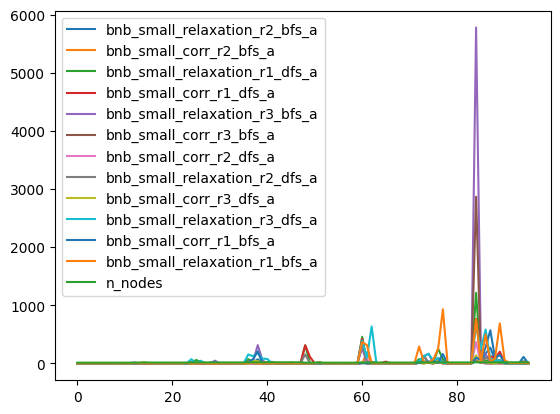

In [10]:
df_n_pruned_strips['n_nodes'] = df_n_pruned_strips['problem_name'].str.extract('_(\d+)_').astype(int)
df_n_pruned_strips.plot( kind='line')


In [11]:
df_n_pruned_strips = df_n_pruned_strips.select_dtypes(include=['float64', 'int64'])

mean_df_n_pruned_strips = df_n_pruned_strips.groupby('n_nodes').mean()



In [12]:
df_n_steps['n_nodes'] = df_n_steps['problem_name'].str.extract('_(\d+)_').astype(int)
df_n_steps = df_n_steps.select_dtypes(include=['float64', 'int64'])
mean_df_n_steps = df_n_steps.groupby('n_nodes').mean()


In [13]:
len(df_first_seen)

96

In [25]:
import matplotlib.pyplot as plt
import numpy as np


def plot_for_affixes(data, mean_data, affixes, ax, color_map=None, title=''):
    plt.style.use('seaborn-v0_8-paper')
    
    col_mask = [col for col in data.columns if all(affix in col for affix in affixes)]
    plot_data = mean_data[col_mask].copy()
    
    new_cols = [col for col in plot_data.columns]
    for affix in affixes:
        new_cols = [col.replace(affix, '').replace('_', '') for col in new_cols]
    plot_data.columns = new_cols
    
    # Create plot and store lines and labels
    lines = []
    labels = []
    for col in plot_data.columns:
        if col != 'n_nodes':
            clean_label = col.lstrip('_').replace('bnb', '').replace('small', '').replace('classical', 'Classical').replace('relaxation', 'Selective Composition').replace('corr', 'Correlation')
            # Use color from map if available
            if color_map and clean_label in color_map:
                line = ax.plot(plot_data.index, plot_data[col], marker='o', 
                             label=clean_label, linewidth=0.5, 
                             color=color_map[clean_label])[0]
            else:
                line = ax.plot(plot_data.index, plot_data[col], marker='o', 
                             label=clean_label, linewidth=0.5)[0]
            lines.append(line)
            labels.append(clean_label)
    
    # Draw reference dashed lines for each node
    # for n_node in plot_data.index:
    #     ax.axhline(y=2**((n_node-9)), color='gray', linestyle='--', linewidth=0.5)
    
    ax.set_xlabel('Number of Nodes', fontsize=11)
    ax.set_ylabel('Number of Prunings', fontsize=11)
    ax.set_title(f'{", ".join(affixes)}', fontsize=12)
    ax.set_xticks(plot_data.index)
    ax.set_xticklabels(plot_data.index)
    ax.grid(False)
    
    # Sort the lines and labels together
    if lines:
        sorted_pairs = sorted(zip(labels, lines))
        sorted_labels, sorted_lines = zip(*sorted_pairs)
        ax.legend(sorted_lines, sorted_labels, frameon=False, loc='best')
        
        # Return the color mapping (either new or updated)
        return {label: line.get_color() for label, line in zip(sorted_labels, sorted_lines)}
    return {}

In [15]:
import matplotlib.pyplot as plt
import numpy as np


def plot_bar_for_affixes(data, mean_data, data_2, mean_data_2, affixes, ax, color_map=None):
    plt.style.use('seaborn-v0_8-paper')
    
    col_mask = [col for col in data.columns if all(affix in col for affix in affixes)]
    plot_data_1 = mean_data[col_mask].copy()
    plot_data_2 = mean_data_2[col_mask].copy()
    
    new_cols = [col for col in plot_data_1.columns]
    for affix in affixes:
        new_cols = [col.replace(affix, '').replace('_', '') for col in new_cols]
    plot_data_1.columns = new_cols
    plot_data_2.columns = new_cols
    
    # Create bar plot
    bar_width = 0.15
    indices = np.arange(len(plot_data_1.index))
    
    for i, col in enumerate(plot_data_1.columns):
        if col != 'n_nodes':
            clean_label = col.lstrip('_').replace('bnb', '').replace('small', '').replace('classical', 'Classical').replace('relaxation', 'Selective Composition').replace('corr', 'Correlation')
            # Use color from map if available
            color_1 = color_map[clean_label] if color_map and clean_label in color_map else None
            color_2 = color_map[clean_label] if color_map and clean_label in color_map else None
            
            ax.bar(indices + i * bar_width, plot_data_1[col], bar_width, label=f'{clean_label} (mean_data)', color=color_1)
            ax.bar(indices + i * bar_width + bar_width, plot_data_2[col], bar_width, label=f'{clean_label} (mean_data_2)', color=color_2)
    
    ax.set_xlabel('Number of Nodes', fontsize=11)
    ax.set_ylabel('First Occurrence of the Optimal', fontsize=11)
    ax.set_title(f'{", ".join(affixes)}', fontsize=12)
    ax.set_xticks(indices + bar_width / 2)
    ax.set_xticklabels(plot_data_1.index)
    ax.grid(False)
    
    ax.legend(frameon=False, loc='best')
    
    return {}

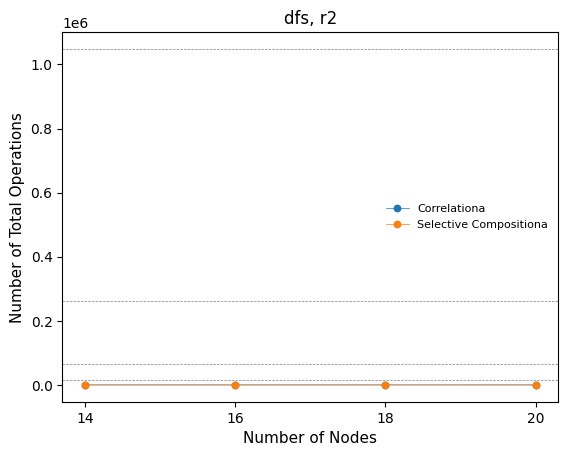

In [16]:
%matplotlib inline
ax = plt.gca()
plot_for_affixes(df_n_pruned_strips, mean_df_n_pruned_strips, ['dfs', 'r2'], ax)
plt.show()

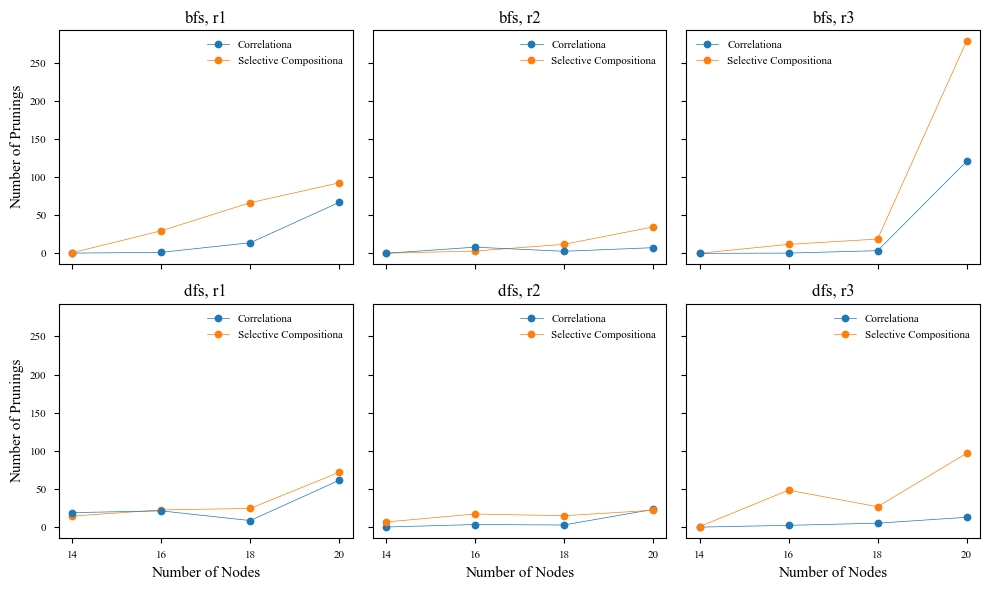

In [26]:
from itertools import product

fig, axes = plt.subplots(2, 3, figsize=(10, 6), sharex=True, sharey=True)
color_mapping = {'Correlation': '#1f77b4', 'Selective Composition': '#ff0000', 'Classical': '#00a000'}
for ax, affix in zip(axes.flatten(), list(product(['bfs', 'dfs'], ['r1', 'r2', 'r3']))):
    color_mapping = plot_for_affixes(df_n_pruned_strips, mean_df_n_pruned_strips, affix, ax, color_mapping)
    # Only show x-axis labels for bottom row
for ax in axes[0,:]:
    ax.set_xlabel('')
for ax in axes[:,1:].flatten():
    ax.set_ylabel('')


plt.rcParams['font.family'] = 'Times New Roman'
fig = plt.gcf()
fig.tight_layout()

fig.savefig(f'./img/prunes.pgf', format='pgf', bbox_inches='tight')
# fig.savefig(f'./img/steps_vs_n_nodes.svg', format='svg')
plt.show()


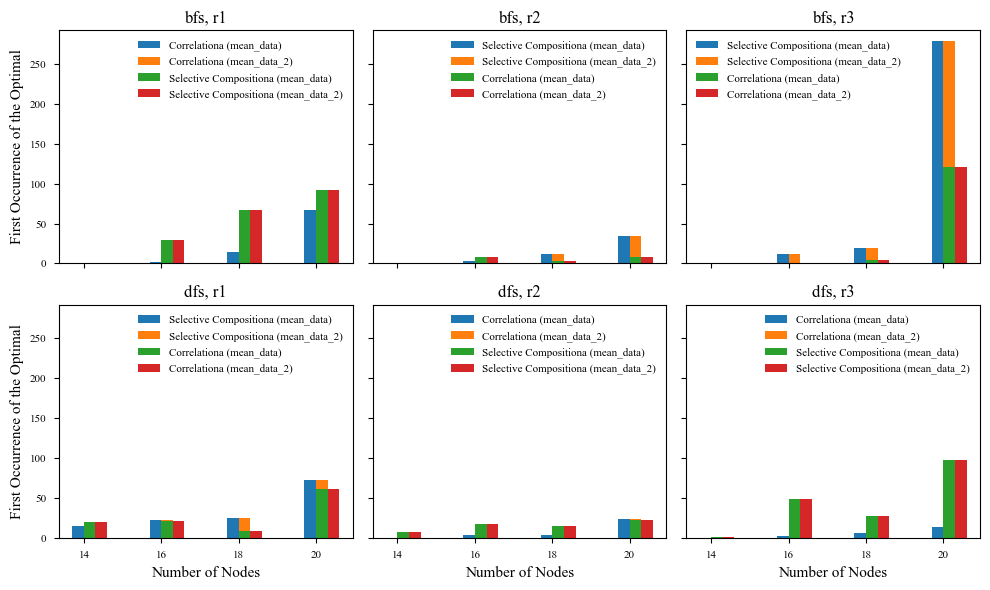

In [172]:
from itertools import product

fig, axes = plt.subplots(2, 3, figsize=(10, 6), sharex=True, sharey=True)
color_mapping = {'Correlation': '#1f77b4', 'Selective Composition': '#ff0000', 'Classical': '#00a000'}
for ax, affix in zip(axes.flatten(), list(product(['bfs', 'dfs'], ['r1', 'r2', 'r3']))):
    plot_bar_for_affixes(df_n_pruned_strips, mean_df_n_pruned_strips, df_n_pruned_strips, mean_df_n_pruned_strips, affix, ax, color_mapping)

# Only show x-axis labels for bottom row
for ax in axes[0,:]:
    ax.set_xlabel('')
for ax in axes[:,1:].flatten():
    ax.set_ylabel('')

plt.rcParams['font.family'] = 'Times New Roman'
fig = plt.gcf()
fig.tight_layout()

fig.savefig(f'./img/first_seen_vs_n_nodes.pgf', format='pgf', bbox_inches='tight')
plt.show()

In [13]:
print("Available matplotlib styles:")
for style in plt.style.available:
    print(style)


Available matplotlib styles:
Solarize_Light2
_classic_test_patch
_mpl-gallery
_mpl-gallery-nogrid
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn-v0_8
seaborn-v0_8-bright
seaborn-v0_8-colorblind
seaborn-v0_8-dark
seaborn-v0_8-dark-palette
seaborn-v0_8-darkgrid
seaborn-v0_8-deep
seaborn-v0_8-muted
seaborn-v0_8-notebook
seaborn-v0_8-paper
seaborn-v0_8-pastel
seaborn-v0_8-poster
seaborn-v0_8-talk
seaborn-v0_8-ticks
seaborn-v0_8-white
seaborn-v0_8-whitegrid
tableau-colorblind10


In [14]:
!pip install  tikzplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [90]:

p_folder = 'effect_p'

csv_files = glob(f'./{p_folder}/*bnb_corr_*.csv')

In [98]:
p_plot_data = {}
for csv_file in csv_files:
    p = Path(csv_file).stem[-1]
    p_plot_data[p] = pd.read_csv(csv_file)['first_seen'].mean()

p_plot_data = pd.DataFrame(p_plot_data, index=[0])
p_plot_data = p_plot_data.sort_index(axis=1)


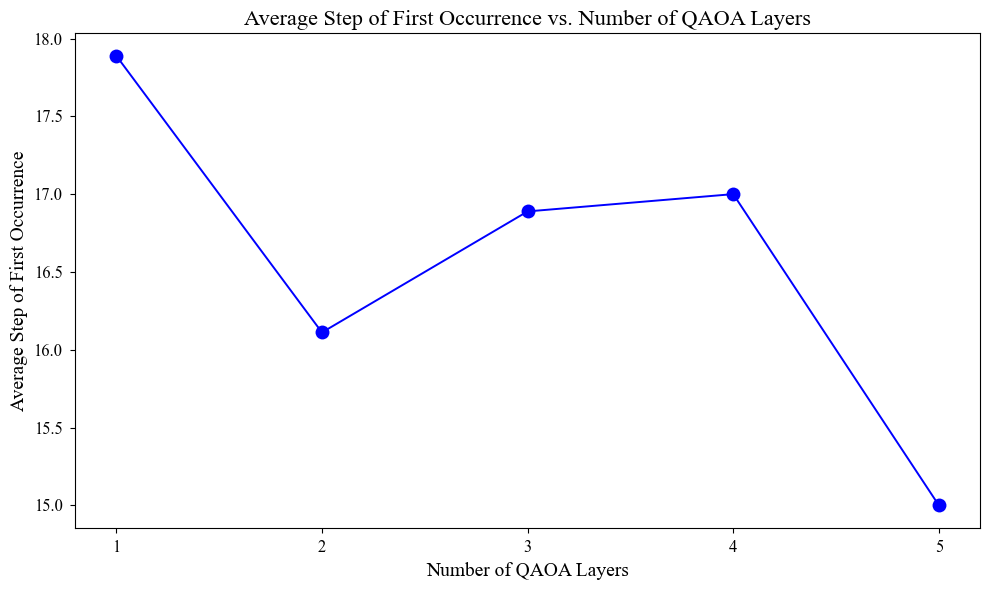

In [114]:
import matplotlib.pyplot as plt
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(p_plot_data.columns, p_plot_data.loc[0], marker='o', markersize=10, markerfacecolor='blue', markeredgecolor='blue', linestyle='-', color='blue')
plt.xlabel('Number of QAOA Layers', fontsize=14)
plt.ylabel('Average Step of First Occurrence', fontsize=14)
plt.title('Average Step of First Occurrence vs. Number of QAOA Layers', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

fig = plt.gcf()
fig.savefig(f'./img/p_layer_effect.pgf', format='pgf', bbox_inches='tight')
plt.show()


In [115]:
rqaoa_file = '/Users/hoijanlai/Desktop/🥨🇩🇪🍻/🐈thesis/proj/RUN_DATA/rqaoa_performance.csv'
bnb_file = '/Users/hoijanlai/Desktop/🥨🇩🇪🍻/🐈thesis/proj/small_random2/bnb_relaxation_r2_implied_k_bfs_gapScale=3_rp=0.3_gap=35_bfs.csv'


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


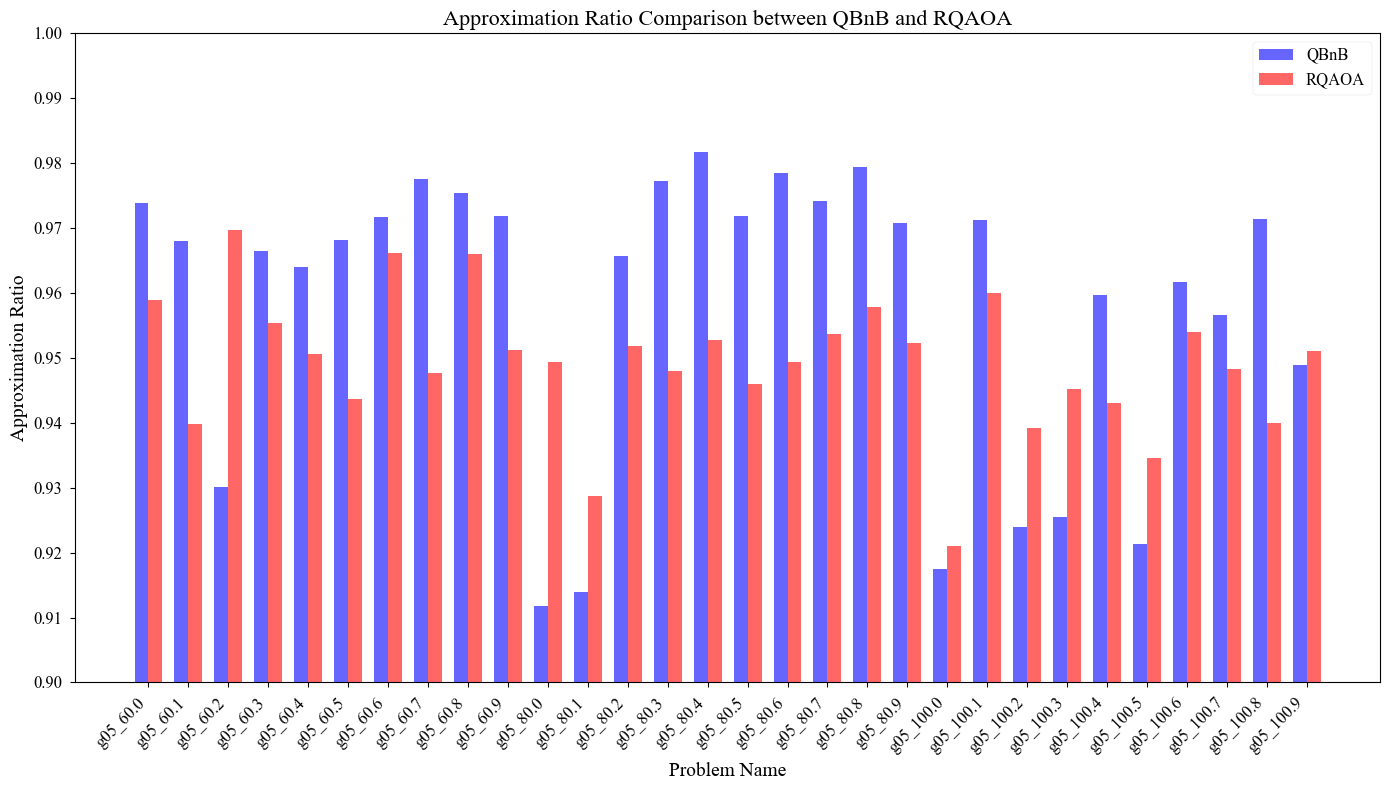

In [133]:
rqaoa_df = pd.read_csv(rqaoa_file)
bnb_df = pd.read_csv(bnb_file)

rqaoa_df['n_nodes'] = rqaoa_df['problem_name'].str.extract('_(\d+).').astype(int)
bnb_df['n_nodes'] = bnb_df['problem_name'].str.extract('_(\d+).').astype(int)

# Merge the dataframes on 'problem_name' and 'n_nodes'
merged_df = pd.merge(rqaoa_df, bnb_df, on=['problem_name', 'n_nodes'], suffixes=('_RQAOA', '_QBnB'))

# Plot the data
plt.figure(figsize=(14, 8))
bar_width = 0.35
index = np.arange(len(merged_df))

# Bar plot for QBnB approximation ratios
plt.bar(index, merged_df['approx_ratio_QBnB'], bar_width, label='QBnB', color='blue', alpha=0.6)

# Bar plot for RQAOA approximation ratios
plt.bar(index + bar_width, merged_df['approx_ratio_RQAOA'], bar_width, label='RQAOA', color='red', alpha=0.6)

plt.xlabel('Problem Name', fontsize=14)
plt.ylabel('Approximation Ratio', fontsize=14)
plt.title('Approximation Ratio Comparison between QBnB and RQAOA', fontsize=16)
plt.xticks(index + bar_width / 2, merged_df['problem_name'], rotation=45, ha='right', fontsize=12)
plt.ylim(0.9, 1.0)
plt.yticks(np.arange(0.9, 1.01, 0.01), fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

fig = plt.gcf()
fig.savefig(f'./img/QBnB_vs_RQAOA_approx_ratio_comparison.eps', format='eps', bbox_inches='tight')
plt.show()







In [121]:
len(bnb_df)

30